In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
red=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

In [0]:
red['type']=0
white['type']=1

In [0]:
wine=pd.concat([red,white],axis=0)

In [0]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

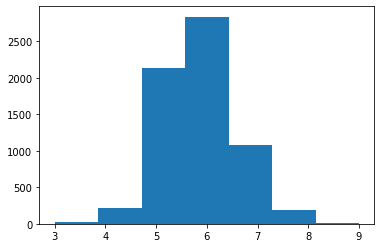

In [0]:
plt.hist(wine['quality'],bins=7)
plt.show()

In [0]:
wine.loc[wine['quality']<=5,'quality']=0
wine.loc[wine['quality']==6,'quality']=1
wine.loc[wine['quality']>=7,'quality']=2

In [0]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


In [0]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: quality, dtype: float64
1    2836
0    2384
2    1277
Name: quality, dtype: int64


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
wine=scaler.fit_transform(wine)

In [0]:
np.random.shuffle(wine)

In [0]:
pd.DataFrame(wine).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.297521,0.073333,0.253012,0.088957,0.096346,0.131944,0.474654,0.167534,0.449612,0.061798,0.231884,0.5,1.0
1,0.190083,0.126667,0.265060,0.093558,0.053156,0.208333,0.516129,0.153075,0.310078,0.101124,0.130435,0.0,1.0
2,0.305785,0.166667,0.228916,0.124233,0.194352,0.166667,0.444700,0.192790,0.201550,0.196629,0.202899,0.0,1.0
3,0.148760,0.173333,0.180723,0.096626,0.048173,0.076389,0.191244,0.106998,0.410853,0.151685,0.449275,0.5,1.0
4,0.231405,0.153333,0.042169,0.013804,0.039867,0.187500,0.317972,0.095816,0.341085,0.112360,0.289855,0.0,1.0


In [0]:
train_idx=int(len(wine)*0.8)
train_Y,test_Y=wine[:train_idx,-2],wine[train_idx:,-2] #train test split
train_X,test_X=np.delete(wine[:train_idx,:],-2,1),np.delete(wine[train_idx:,:],-2,1)
tf.keras.utils.to_categorical(train_Y,num_classes=3) #one hot encoding
tf.keras.utils.to_categorical(test_Y,num_classes=3) #one hot encoding

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [0]:
print(train_X.shape)
print(train_Y.shape)

(5197, 12)
(5197,)


In [0]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=48,activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dense(units=24,activation='relu'))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=3,activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 39        
Total params: 2,139
Trainable params: 2,139
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(train_X,train_Y,epochs=40,batch_size=32,validation_split=0.24)
#                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=10,monitor='val_loss')])

Train on 3949 samples, validate on 1248 samples
Epoch 1/40
3949/3949 [==============================] - 0s 114us/sample - loss: 0.3961 - accuracy: 0.4004 - val_loss: 0.5077 - val_accuracy: 0.3654
Epoch 2/40
3949/3949 [==============================] - 0s 103us/sample - loss: 0.4009 - accuracy: 0.3885 - val_loss: 0.4352 - val_accuracy: 0.4135
Epoch 3/40
3949/3949 [==============================] - 0s 107us/sample - loss: 0.3980 - accuracy: 0.3960 - val_loss: 0.4480 - val_accuracy: 0.4255
Epoch 4/40
3949/3949 [==============================] - 0s 97us/sample - loss: 0.3986 - accuracy: 0.3862 - val_loss: 0.4341 - val_accuracy: 0.4327
Epoch 5/40
3949/3949 [==============================] - 0s 96us/sample - loss: 0.3966 - accuracy: 0.3971 - val_loss: 0.4417 - val_accuracy: 0.4663
Epoch 6/40
3949/3949 [==============================] - 0s 98us/sample - loss: 0.3932 - accuracy: 0.3940 - val_loss: 0.4239 - val_accuracy: 0.4215
Epoch 7/40
3949/3949 [==============================] - 0s 92us/sam

<function matplotlib.pyplot.show>

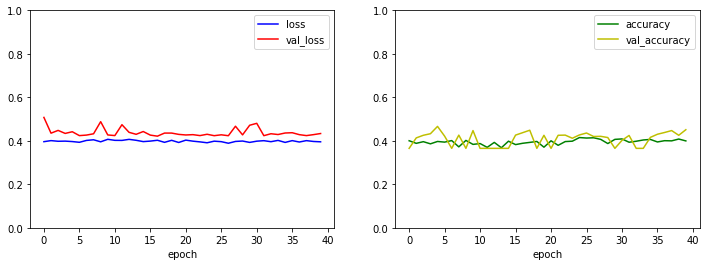

In [0]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r-',label='val_loss')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'y-',label='val_accuracy')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend()

plt.show